# FX Trading Data Analysis

## Part 3 - Year on Year Analysis (2015 and 2016)

### Introduction

Now that we are done with analysis for [2015 (Part 1)](http://nbviewer.jupyter.org/github/zayedshah/FX-Trading-Data-Analysis/blob/master/Part%201_2015.ipynb) and [2016 (Part 2)](http://nbviewer.jupyter.org/github/zayedshah/FX-Trading-Data-Analysis/blob/master/Part%202_2016.ipynb)
, lets do a year-on-year analysis for those 2 years.

We have seen that 2016 performance was less volatile than 2015. Lets dive in and see the comparison between the 2 years from a few angles. I think we will see some interesting observations.

### Getting in the Data

Lets import the usual Python modules - pandas, numpy, matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

I have kept the trades separately for the 2 years. Below I read them in.

In [2]:
trades_2015 = pd.read_excel('Trades/Trades 2015.xlsx',sheetname='Trades')
trades_2016 = pd.read_excel('Trades/Trades 2016.xlsx',sheetname='Trades')

I am combining the trades together.

In [3]:
df = pd.concat([trades_2015, trades_2016])

### Checking the Data

Now that we read the data in, lets see the row count.

We see 2583 - this should be the total number of trades for the 2 years.

Observe that Close column is object data type - we will need to change it to datetime to perform operations on it. We will take care of it few steps later.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583 entries, 0 to 462
Data columns (total 12 columns):
Ticket #      2583 non-null int64
Symbol        2583 non-null object
Volume        2583 non-null int64
Open          2583 non-null object
Close         2583 non-null object
B/S           2583 non-null object
Sold          2583 non-null float64
Bought        2583 non-null float64
Gross P/L     2583 non-null float64
Rollover      2583 non-null float64
Net P/L       2583 non-null float64
Created By    2583 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 262.3+ KB


We can verify that the count is indeed the sum of the trades from 2015 and 2016.

In [5]:
len(trades_2015) + len(trades_2016)

2583

Lets take a look at the first few trades, and verify that it looks goods.

So far so good.

In [6]:
df.head()

,Ticket #,Symbol,Volume,Open,Close,B/S,Sold,Bought,Gross P/L,Rollover,Net P/L,Created By
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,1/5/15 11:35 AM,S,143.431,143.409,0.24,0.00,0.24,7510123597
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,1/6/15 10:02 AM,S,143.389,141.540,51.20,0.00,51.20,7510123597
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,1/7/15 12:08 AM,S,143.389,141.036,65.45,0.00,65.45,7510123597
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,1/6/15 10:03 AM,S,118.804,117.807,27.61,-0.08,27.53,7510123597
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,1/7/15 12:09 AM,S,118.804,117.437,38.02,-0.16,37.86,7510123597


### Performing Operations on the Data

As mentioned above, lets change Close column to datetime.

In [7]:
df['Close'] = pd.to_datetime(df.Close)

And we can verify that Close column has been changed to datetime.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583 entries, 0 to 462
Data columns (total 12 columns):
Ticket #      2583 non-null int64
Symbol        2583 non-null object
Volume        2583 non-null int64
Open          2583 non-null object
Close         2583 non-null datetime64[ns]
B/S           2583 non-null object
Sold          2583 non-null float64
Bought        2583 non-null float64
Gross P/L     2583 non-null float64
Rollover      2583 non-null float64
Net P/L       2583 non-null float64
Created By    2583 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 262.3+ KB


Changing Close column to datetime will allow me to get the months and years from the timestamp, and we will be using this to group PnL by months and years.

Lets get the month first.

In [9]:
df['Month'] = df['Close'].map(lambda x: x.strftime('%b'))

Lets verify that we are able to get the months.

Looks good - Month column created, with the month in which the trade was performed.

In [10]:
df.head()

,Ticket #,Symbol,Volume,Open,Close,B/S,Sold,Bought,Gross P/L,Rollover,Net P/L,Created By,Month
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,2015-01-05 11:35:00,S,143.431,143.409,0.24,0.00,0.24,7510123597,Jan
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-06 10:02:00,S,143.389,141.540,51.20,0.00,51.20,7510123597,Jan
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-07 00:08:00,S,143.389,141.036,65.45,0.00,65.45,7510123597,Jan
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-06 10:03:00,S,118.804,117.807,27.61,-0.08,27.53,7510123597,Jan
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-07 00:09:00,S,118.804,117.437,38.02,-0.16,37.86,7510123597,Jan


Below I get the year.

In [11]:
df['Year'] = df.Close.map(lambda x: x.strftime('%Y'))

We are able to verify that Year column is created, with the year in which the trade was performed.

In [12]:
df.head()

,Ticket #,Symbol,Volume,Open,Close,B/S,Sold,Bought,Gross P/L,Rollover,Net P/L,Created By,Month,Year
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,2015-01-05 11:35:00,S,143.431,143.409,0.24,0.00,0.24,7510123597,Jan,2015
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-06 10:02:00,S,143.389,141.540,51.20,0.00,51.20,7510123597,Jan,2015
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-07 00:08:00,S,143.389,141.036,65.45,0.00,65.45,7510123597,Jan,2015
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-06 10:03:00,S,118.804,117.807,27.61,-0.08,27.53,7510123597,Jan,2015
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-07 00:09:00,S,118.804,117.437,38.02,-0.16,37.86,7510123597,Jan,2015


Lets also verify that the Year column is created successfully - there should be only 2 years.

And we see that that's the case.

In [13]:
df.Year.unique()

array(['2015', '2016'], dtype=object)

Similarly, lets verify for the months.

And it looks good.

We will be needing this months list - in the next step where I convert Month as type category - this helps me in ordering PnLs by months - we will see that later. If this step is not performed, when we group PnLs by months, they will be ordered alphabetically (beginning with April, rather than January).

In [14]:
df.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

Below I convert Month to category data type.

In [15]:
df.Month = df.Month.astype('category', categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

As we have seen in analysis for 2015 and 2016, its good to have the column names without spaces etc, so below I take care of that.

In [16]:
df.rename(columns={'Net P/L':'NetPnL','Gross P/L':'GrossPnL','Created By':'Account','Ticket #':'TicketId'},
         inplace=True)

Looking at the first few rows, we see that it looks good.

Close column is datetime, Month and Year column created, and column names are as we wanted.

In [17]:
df.head()

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account,Month,Year
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,2015-01-05 11:35:00,S,143.431,143.409,0.24,0.00,0.24,7510123597,Jan,2015
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-06 10:02:00,S,143.389,141.540,51.20,0.00,51.20,7510123597,Jan,2015
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-07 00:08:00,S,143.389,141.036,65.45,0.00,65.45,7510123597,Jan,2015
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-06 10:03:00,S,118.804,117.807,27.61,-0.08,27.53,7510123597,Jan,2015
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-07 00:09:00,S,118.804,117.437,38.02,-0.16,37.86,7510123597,Jan,2015


### Initial Analysis

Lets start doing some analysis.

Pulling out Net PnL, we see that I lost around £5000 in 2015 and around £1500 in 2016.

To put this in perspective, I began 2015 with £10,000. I put in another £1000 during the year. So, my AUM - Asset Under Management, for 2015 was £11,000. Percentage wise, I lost a little less than 50% of my capital.

I was left with around £6000 when 2016 began. So having lost around £1500, my performance for 2016 was -25%.

The consolation for me was that - I had read about hedge funds losing more than 50% in a year. And another consolation was that I had not completely blown away my capital in 2 years of trading.

In [18]:
df.groupby('Year', as_index=False)['NetPnL'].sum()

,Year,NetPnL
0,2015,-5081.03
1,2016,-1548.05


Les create a summary for the years with AUM, Net PnL and Performance.

So we see that I lost around half my capital in 2015, but in 2016, it looks like I got a better grip on my performance, and ended up losing  only around a quarter of my capital. Of course, I wish I had made a positive return.

In [19]:
df_t = df.groupby('Year', as_index=False)['NetPnL'].sum() 
# df_t is short for dataframe_temp

df_t['AUM'] = 0
df_t.loc[0,'AUM'] = 11000
df_t.loc[1, 'AUM'] = df_t.loc[0, 'AUM'] - np.abs(df_t.loc[0, 'NetPnL'])
df_t['Performance'] = 0
df_t.Performance = round(100 * df_t.NetPnL / df_t.AUM, 2)
df_t.Performance = df_t.Performance.map(lambda x: '{:.2f}%'.format(x))
df_t = df_t[['Year','AUM','NetPnL','Performance']]
df_t.set_index('Year', inplace=True)
df_t

,AUM,NetPnL,Performance
Year,,,
2015,11000.00,-5081.03,-46.19%
2016,5918.97,-1548.05,-26.15%


### Digress ..

Here we digress for a bit.

I wanted to get separate data for 2015 and 2016 - it will be convenient when plotting etc. The below steps are for that.

It also allows me to verify that there are actually trades from 2015 and 2016. Until now, we have just seen taken a peek of the trades from 2015.

In [20]:
df_15 = df[df.Year == '2015']
df_15.head()

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account,Month,Year
0,17359665,EUR/JPY,2000,1/5/15 11:11 AM,2015-01-05 11:35:00,S,143.431,143.409,0.24,0.00,0.24,7510123597,Jan,2015
1,17360113,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-06 10:02:00,S,143.389,141.540,51.20,0.00,51.20,7510123597,Jan,2015
2,17377272,EUR/JPY,5000,1/5/15 11:35 AM,2015-01-07 00:08:00,S,143.389,141.036,65.45,0.00,65.45,7510123597,Jan,2015
3,17367846,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-06 10:03:00,S,118.804,117.807,27.61,-0.08,27.53,7510123597,Jan,2015
4,17377376,CHF/JPY,5000,1/5/15 4:47 PM,2015-01-07 00:09:00,S,118.804,117.437,38.02,-0.16,37.86,7510123597,Jan,2015


In [21]:
df_16 = df[df.Year == '2016']
df_16.head()

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account,Month,Year
0,21486534,GBP/JPY,3000,12/14/15 5:59 PM,2016-01-19 08:15:00,S,182.7470,168.75900,248.66,-1.51,247.15,7510123597,Jan,2016
1,21486595,GBP/NZD,2000,12/14/15 6:01 PM,2016-01-04 03:56:00,S,2.2330,2.17882,49.73,1.80,51.53,7510123597,Jan,2016
2,21533152,AUD/JPY,4000,12/17/15 5:41 PM,2016-01-08 01:15:00,S,87.2030,83.61000,83.12,-4.10,79.02,7510123597,Jan,2016
3,21533187,CAD/JPY,4000,12/17/15 5:45 PM,2016-01-19 07:03:00,S,87.9100,81.55200,151.03,-1.26,149.77,7510123597,Jan,2016
4,21545894,EUR/NZD,2000,12/18/15 5:33 PM,2016-01-06 16:47:00,S,1.6066,1.62096,-13.04,1.39,-11.65,7510123597,Jan,2016


In below 2 steps, I wanted to check the row count - to verify the number of trades again. 

And it looks good - 2120 from 2015 and 463 from 2016. They look about right.

In [22]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 2119
Data columns (total 14 columns):
TicketId    2120 non-null int64
Symbol      2120 non-null object
Volume      2120 non-null int64
Open        2120 non-null object
Close       2120 non-null datetime64[ns]
B/S         2120 non-null object
Sold        2120 non-null float64
Bought      2120 non-null float64
GrossPnL    2120 non-null float64
Rollover    2120 non-null float64
NetPnL      2120 non-null float64
Account     2120 non-null int64
Month       2120 non-null category
Year        2120 non-null object
dtypes: category(1), datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 234.4+ KB


In [23]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Data columns (total 14 columns):
TicketId    463 non-null int64
Symbol      463 non-null object
Volume      463 non-null int64
Open        463 non-null object
Close       463 non-null datetime64[ns]
B/S         463 non-null object
Sold        463 non-null float64
Bought      463 non-null float64
GrossPnL    463 non-null float64
Rollover    463 non-null float64
NetPnL      463 non-null float64
Account     463 non-null int64
Month       463 non-null category
Year        463 non-null object
dtypes: category(1), datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 51.5+ KB


### Distribution of PnL

Lets do a scatter plot for the PnLs for the 2 years.

We see - first of all, that in 2016, there were no big losses, like thousands of pounds; the nastiest loss seems to lie around £200.

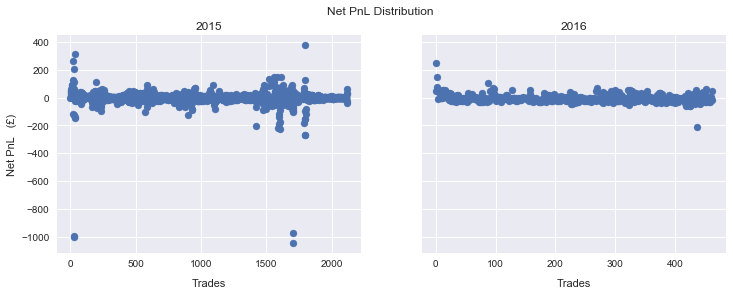

In [24]:
f, (a0, a1) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
f.suptitle('Net PnL Distribution')

a0.scatter(df_15.NetPnL.index, df_15.NetPnL)
a1.scatter(df_16.NetPnL.index, df_16.NetPnL)

a0.set_title('2015')
a0.set_xlabel('Trades', labelpad=10)
a0.set_ylabel('Net PnL   (£)')

a1.set_title('2016')
a1.set_xlabel('Trades', labelpad=10)

We also want to see how it looks like with some alpha (=0.5).

Its the same distribution we have seen separately for 2015 and 2016, but here we can see side by side.

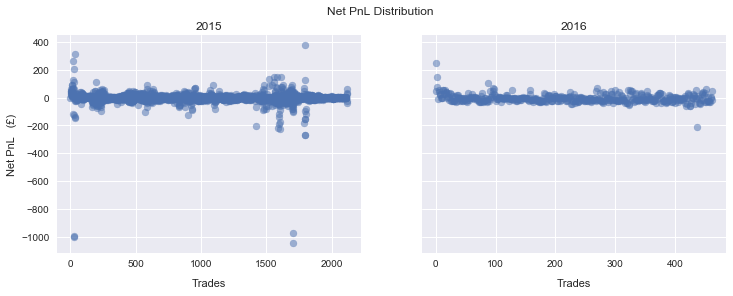

In [25]:
f, (a0, a1) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
f.suptitle('Net PnL Distribution')

a0.scatter(df_15.NetPnL.index, df_15.NetPnL, alpha=0.5)
a1.scatter(df_16.NetPnL.index, df_16.NetPnL, alpha=0.5)

a0.set_title('2015')
a0.set_xlabel('Trades', labelpad=10)
a0.set_ylabel('Net PnL   (£)')

a1.set_title('2016')
a1.set_xlabel('Trades', labelpad=10)

Distribution of PnLs with Seaborn box plot.

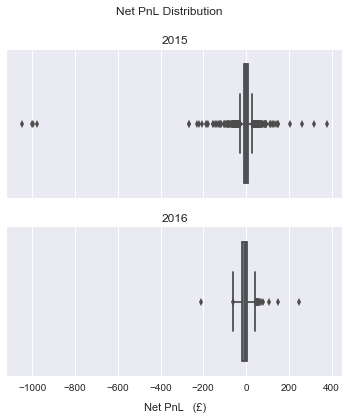

In [26]:
f, (a0, a1) = plt.subplots(2, 1, sharex=True, figsize=(6,6))
f.suptitle('Net PnL Distribution')

sns.boxplot(df_15.NetPnL, ax=a0)
sns.boxplot(df_16.NetPnL, ax=a1)

a0.set_title('2015')
a0.set_xlabel('')

a1.set_title('2016')
a1.set_xlabel('Net PnL   (£)', labelpad=10)

### Monthly PnL

I was keen to bring the Monthly PnLs side by side, like we have seen with plots above.

In [27]:
df_pt_month_yr = df.pivot_table(values='NetPnL', aggfunc=sum,
                                index='Month', columns='Year')

def colorMap(x):
    return 'color: %s' % ('red' if x < 0 else 'white' if x == 0 else 'green')

df_pt_month_yr.style.applymap(colorMap, subset=['2015','2016'])

Year,2015,2016
Month,,
Jan,-1974.01,679
Feb,-1064.58,-480.78
Mar,894.9,-528.18
Apr,-343.01,-108.51
May,58.94,48.17
Jun,-281.42,-212.61
Jul,-567.34,-55.64
Aug,-231.39,-420.37
Sep,-255.54,-204.07


We see that mean of monthly PnLs for 2015 is around -423, compared to -£129; its saying that 2015 was volatile.

Similar inference can be gleaned from Standard Deviation. For 2015 its £759 while for 2016 its £322, the range is much wider for 2015.

Also notice the min and max. Min for 2015 is -£1974 while for 2016 its -£528. The max - there is not much difference (£894 and £679).

In [28]:
df_pt_month_yr.describe().round(2)

Year,2015,2016
count,12.00,12.00
mean,-423.42,-129.00
std,759.71,322.81
min,-1974.01,-528.18
25%,-691.65,-324.41
50%,-268.48,-156.29
75%,-154.13,-25.56
max,894.90,679.00


Below is a plot of Monthly PnLs side by side for the 2 years.

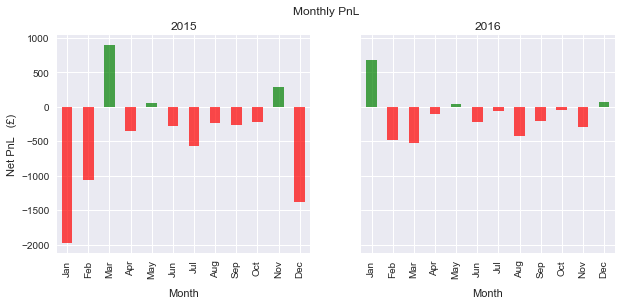

In [29]:
df_pt_month_yr_tmp = df_pt_month_yr.copy()
df_pt_month_yr_tmp.columns.name = None
df_pt_month_yr_tmp.reset_index(inplace=True)

f, (a0, a1) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
f.suptitle('Monthly PnL')

def colorMapGraph(df, col):
    return np.sign(df[col]).map({-1:'r',1:'g'})

def plotBar(year, ax):
    df_pt_month_yr_tmp.plot.bar('Month',year, ax=ax,
                            color=colorMapGraph(df_pt_month_yr_tmp, year),
                            alpha=0.7,
                            legend=False)
    ax.set_title(year)
    ax.set_xlabel('Month', labelpad=10)

plotBar('2015', a0)
plotBar('2016', a1)

a0.set_ylabel('Net PnL   (£)')

I wanted to plot another graph with the Monthly PnLs sorted, but before that lets display it in a tabular format.

I have found that having both table data and visual dsplay is much better. I can switch from one to the other. Just having one is not enough. Say for example, in the graph, I can get a feel for the max PnL for both years, but sometimes I want to know the numbers too.

Looking at the numbers, I can straight away see that for 2015 the max loss is -£1974 while for 2016 its -528. I can get a feel for the difference.

While, if we look at the max PnL, down at the bottom, its £894 and £679 -  so not much difference there.

In [30]:
df_15_t = df_15.groupby(['Month'], as_index=False)['NetPnL'].sum().sort_values('NetPnL').reset_index(drop=True)
df_16_t = df_16.groupby(['Month'], as_index=False)['NetPnL'].sum().sort_values('NetPnL').reset_index(drop=True)
df_ct = pd.concat([df_15_t, df_16_t], axis=1, keys=['2015','2016'])
df_ct.style.applymap(colorMap, subset=[('2015','NetPnL'),(('2016','NetPnL'))])

Now that we have seen the numbers - Monthly Net PnLs, lets plot the graph.

At the risk of repeating what we have observed before, we see that the losses in 2016 were much lesser than in 2015. The point of doing this exercise is to see if we can come at the same conclusions from different angles.

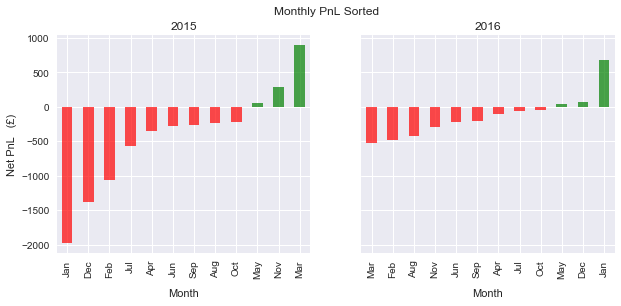

In [31]:
f, (a0, a1) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
f.suptitle('Monthly PnL Sorted')

def plot_MonthlyPnL_Sorted(df, year, ax):
    df.plot.bar('Month','NetPnL', ax=ax,
                color=colorMapGraph(df, 'NetPnL'),
                alpha=0.7,
                legend=False)
    ax.set_title(year)
    ax.set_xlabel('Month', labelpad=10)

plot_MonthlyPnL_Sorted(df_15_t, '2015', a0)
plot_MonthlyPnL_Sorted(df_16_t, '2016', a1)

a0.set_ylabel('Net PnL   (£)')

### PnL by Individual Trades

We shall see the top 20 markets - top 10 profits and top 10 losses, from each year side by side.

We see that the max loss in 2015 was from USDCHF with -£1046 and in 2016 it was from Silver (XAG) with -£210. The difference again, screams out.

In 2016, the losses dropped steeply after Silver, the next one from CADCHF was with -£62, and from there all losses are below £100. While in 2015, all losses were above £100.

With regards to max profits, from both years, we observe that it was GBPJPY that gave the biggest profits.

In [32]:
df_15_MaxPnL = pd.concat([df_15.sort_values('NetPnL').head(10),
                          df_15.sort_values('NetPnL').tail(10)])

df_16_MaxPnL = pd.concat([df_16.sort_values('NetPnL').head(10),
                          df_16.sort_values('NetPnL').tail(10)])

df_15_t1 = df_15_MaxPnL[['Symbol','NetPnL']].reset_index(drop=True) 
df_16_t1 = df_16_MaxPnL[['Symbol','NetPnL']].reset_index(drop=True)

df_ct1 = pd.concat([df_15_t1, df_16_t1], axis=1, keys=['2015', '2016']) 
df_ct1.rename(columns={'Symbol':'Markets'}, inplace=True)

df_ct1.style.applymap(colorMap, subset=[('2015','NetPnL'),(('2016','NetPnL'))])

Lets plot the graph now.

This is an interesting graph. The magnitude of losses in 2015 compared to 2016 is just ridiculous. Lot of big red strokes downwards for 2015, while for 2016 its just smallish red strokes that seems almost like they want to go into hiding.

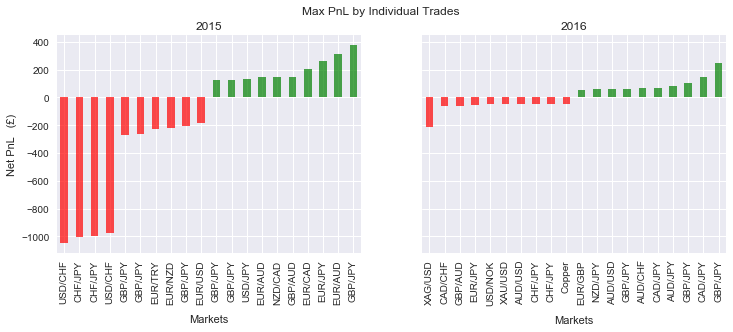

In [33]:
f, (a0, a1) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
f.suptitle('Max PnL by Individual Trades')

def plotBar_PnL(df, year, ax):
    df.plot.bar('Symbol','NetPnL', ax=ax,
                            color=colorMapGraph(df, 'NetPnL'),
                            alpha=0.7,
                            legend=False)
    ax.set_title(year)
    ax.set_xlabel('Markets', labelpad=10)

plotBar_PnL(df_15_MaxPnL, '2015', a0)
plotBar_PnL(df_16_MaxPnL, '2016', a1)

a0.set_ylabel('Net PnL   (£)')

### Aggregate PnL by Markets

With the aggregate PnL, we see that the biggest losses came from CHFJPY in 2015 with losses of around £2000, while for 2016, it came from Silver (XAG) with loss of around £300.

Here as well, we have brough in 20 markets for each year - top 10 profits and top 10 losses.

In 2015, EURAUD gave the most profits and in 2016, it was GBPJPY.

In [34]:
def concat_aggPnL(df):
    return pd.concat([
        df.groupby('Symbol', as_index=False)['NetPnL'].sum().sort_values('NetPnL').head(10),
        df.groupby('Symbol', as_index=False)['NetPnL'].sum().sort_values('NetPnL').tail(10)])
    
df_15_aggPnL = concat_aggPnL(df_15)
df_16_aggPnL = concat_aggPnL(df_16)

df_15_t2 = df_15_aggPnL.reset_index(drop=True)
df_16_t2 = df_16_aggPnL.reset_index(drop=True)

df_ct2 = pd.concat([df_15_t2, df_16_t2], axis=1, keys=['2015', '2016']) 
df_ct2.rename(columns={'Symbol':'Markets'}, inplace=True)

df_ct2.style.applymap(colorMap, subset=[('2015','NetPnL'),(('2016','NetPnL'))])

Lets plot the last graph of this analysis. 

And I guess the picture says it all.

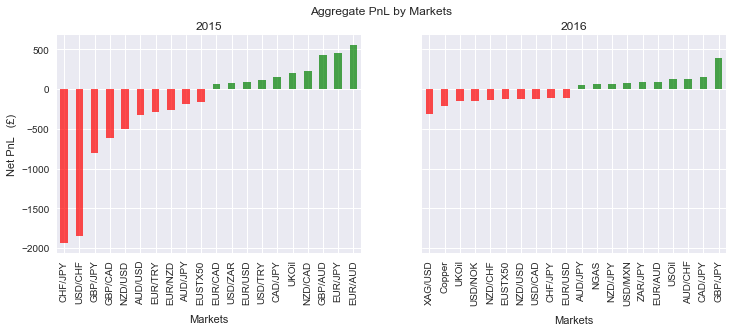

In [35]:
f, (a0, a1) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
f.suptitle('Aggregate PnL by Markets')

plotBar_PnL(df_15_aggPnL, '2015', a0)
plotBar_PnL(df_16_aggPnL, '2016', a1)

a0.set_ylabel('Net PnL   (£)')